In [2]:
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan import Observer, FixedTarget

#Plotting Airmass
%matplotlib inline
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range

from astroplan.plots import plot_airmass

In [46]:
#reading a list of randomly selected galaxies from the UGC list
galaxy_table = pd.read_csv("randomUGC.csv")

In [47]:
#Observing from observatory location
het =  Observer(longitude = -104.014722 * u.deg,
        latitude = 30 * u.deg + 40 * u.arcmin + 53.2 * u.arcsec,
        elevation = 2026 * u.m,
        timezone = 'US/Central',
        name = "Hobby-Eberly Telescope"
        )

In [48]:
#setting up times to observe--August 15-30
current_time = het.timezone
observing_time1 = Time("2019-08-15 00:00:00")
midnight_het = het.midnight(observing_time1, which='nearest')

In [49]:
#twilight to twilight times for observing
astro_set = het.twilight_evening_astronomical(observing_time1, which='nearest')
astro_rise = het.twilight_morning_astronomical(observing_time1, which='next')
midnight_het = het.midnight(observing_time1, which='next')

In [50]:
#function that will return a bool from the galaxy_table, true if galaxy is visible
def istargetup(x):
    target = FixedTarget.from_name(galaxy_table["Name"][x])
    visible = het.target_is_up(midnight_het, target)
    return visible

#mask that can be applied to the galaxy_table to yield which galaxies will be visible
mask = []
for i in range(len(galaxy_table["Name"])):
    mask.append(istargetup(i))

In [51]:
#galaxies that will be visable on observing_time1, but we only need 10 of these so I will pick the first 10
galaxy_table[mask]

,Name
0,UGC10492
2,UGC439
3,UGC12479
4,UGC965
5,UGC991
7,UGC1052
9,UGC1092
11,UGC1727
12,UGC2343
13,UGC1713


In [52]:
#Getting the RA and DEC of the observable objects using AstroPlan

def targetra(x):
    target = FixedTarget.from_name(galaxy_table["Name"][x])
    result = target.ra
    return result

def targetdec(x):
    target = FixedTarget.from_name(galaxy_table["Name"][x])
    result = target.dec
    return result

ra = []
dec = []

for i in range(len(galaxy_table["Name"])):
    ra.append(targetra(i).hms)
    dec.append(targetdec(i).dms)

In [53]:
#Adding the RA and DEC to my pandas table
galaxy_table["RA(hms)"] = ra
galaxy_table["DEC(dms)"] = dec

# Table of Observable Galaxies on August 15th - August30th

In [62]:
galaxy_table_observable = galaxy_table[mask][0:10]
galaxy_table_observable = galaxy_table_observable.reset_index(drop=True)
galaxy_table_observable

,Name,RA(hms),DEC(dms)
0,UGC10492,"(16.0, 39.0, 24.38400000001394)","(-2.0, -25.0, -50.5199999999995)"
1,UGC439,"(0.0, 41.0, 27.38400000000098)","(-1.0, -42.0, -33.1200000000004)"
2,UGC12479,"(23.0, 17.0, 28.15200000001454)","(-1.0, -35.0, -35.87999999999994)"
3,UGC965,"(1.0, 24.0, 39.048000000001295)","(-1.0, -34.0, -23.15999999999974)"
4,UGC991,"(1.0, 25.0, 27.04800000000091)","(-1.0, -32.0, -24.719999999999942)"
5,UGC1052,"(1.0, 28.0, 9.144000000001284)","(-1.0, -17.0, -28.679999999999666)"
6,UGC1092,"(1.0, 31.0, 39.28800000000052)","(-0.0, -55.0, -34.68000000000018)"
7,UGC1727,"(2.0, 14.0, 33.19200000000183)","(-0.0, -46.0, -2.279999999999802)"
8,UGC2343,"(2.0, 51.0, 39.07200000000188)","(-0.0, -44.0, -42.00000000000017)"
9,UGC1713,"(2.0, 13.0, 33.216000000000605)","(-0.0, -44.0, -0.2400000000002933)"


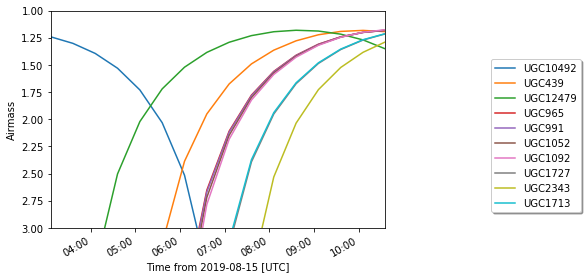

In [63]:
observing_length = (astro_rise - astro_set).to(u.h)

start_time = astro_set
end_time = astro_rise
#time to observe without destroying the CCD with the sun
observing_range = [astro_set, astro_rise]

time_grid = time_grid_from_range(observing_range)

#plotting how long to view object based on airmass

def target(x):
    target = FixedTarget.from_name(galaxy_table_observable["Name"][x])
    return target



for i in range(len(galaxy_table_observable['Name'])):
    plot_airmass(target(i), het, time_grid);
    
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)


In [64]:
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination

In [65]:
moon_observing = get_body('moon',observing_time1)
moon_illumination(observing_time1)

0.9970609659215346

In [66]:
print(moon_observing.ra.hms)
print(moon_observing.dec.dms)

hms_tuple(h=21.0, m=16.0, s=41.48403520171172)
dms_tuple(d=-18.0, m=-27.0, s=-12.57342903422682)


# Looking one month ahead

In [89]:
observing_time2 = Time("2019-09-15 00:00:00")
astro_set2 = het.twilight_evening_astronomical(observing_time2, which='nearest')
astro_rise2 = het.twilight_morning_astronomical(observing_time2, which='next')
midnight_het2 = het.midnight(observing_time2, which='next')

In [85]:
def istargetup2(x):
    target = FixedTarget.from_name(galaxy_table_observable["Name"][x])
    visible = het.target_is_up(midnight_het2, target)
    return visible

#mask that can be applied to the galaxy_table to yield which galaxies will be visible
mask2 = []
for i in range(len(galaxy_table_observable["Name"])):
    mask2.append(istargetup2(i))

In [86]:
galaxy_table_observable[mask2]

,Name,RA(hms),DEC(dms)
1,UGC439,"(0.0, 41.0, 27.38400000000098)","(-1.0, -42.0, -33.1200000000004)"
2,UGC12479,"(23.0, 17.0, 28.15200000001454)","(-1.0, -35.0, -35.87999999999994)"
3,UGC965,"(1.0, 24.0, 39.048000000001295)","(-1.0, -34.0, -23.15999999999974)"
4,UGC991,"(1.0, 25.0, 27.04800000000091)","(-1.0, -32.0, -24.719999999999942)"
5,UGC1052,"(1.0, 28.0, 9.144000000001284)","(-1.0, -17.0, -28.679999999999666)"
6,UGC1092,"(1.0, 31.0, 39.28800000000052)","(-0.0, -55.0, -34.68000000000018)"
7,UGC1727,"(2.0, 14.0, 33.19200000000183)","(-0.0, -46.0, -2.279999999999802)"
8,UGC2343,"(2.0, 51.0, 39.07200000000188)","(-0.0, -44.0, -42.00000000000017)"
9,UGC1713,"(2.0, 13.0, 33.216000000000605)","(-0.0, -44.0, -0.2400000000002933)"


## This shows that they will all still be observable from the observatory a month later

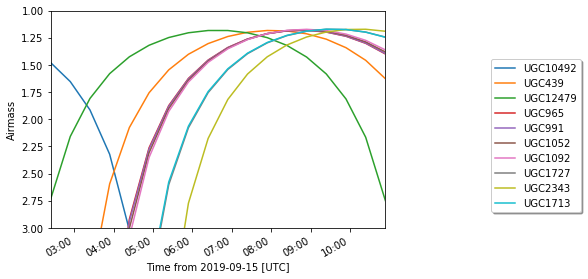

In [75]:
observing_length2 = (astro_rise2 - astro_set2).to(u.h)

start_time2= astro_set2
end_time2 = astro_rise2
#time to observe without destroying the CCD with the sun
observing_range2 = [astro_set2, astro_rise2]

time_grid2 = time_grid_from_range(observing_range2)

#plotting how long to view object based on airmass

def target(x):
    target = FixedTarget.from_name(galaxy_table_observable["Name"][x])
    return target



for i in range(len(galaxy_table_observable['Name'])):
    plot_airmass(target(i), het, time_grid2);
    
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)


In [76]:
moon_observing2 = get_body('moon',observing_time2)
moon_illumination(observing_time2)

0.9923073223657531

In [87]:
print(moon_observing2.ra.hms)
print(moon_observing2.dec.dms)

hms_tuple(h=0.0, m=9.0, s=24.881550381235265)
dms_tuple(d=-4.0, m=-17.0, s=-22.532708388507956)


For this it is apparent that none of my targets will be greater than 30 degrees away from the moon and the moon will be full for the first 4 days of my observation... not great.